# **Metropolitan Transportation Authority Employee Study**

Situation: We only want to look into **Complaints**, specifically looking into **Employees** of the MTA. We want to get a better understanding of what is causing the complaints and how we can direct our focus to decrease them.									
									
1) What are the most common subject matters or specific issues related to the complaints?									
									
2) Analyze the number of complaints filed by year and quarter. Are complaints increasing or decreasing over time?									
									
3) Were there certain branches/routes that had more complaints than others?									
									
4) What are your recommendations to improve customer satisfaction?

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
rail = pd.read_csv(r'...\Portfolio\MTA_Customer_Feedback_Data__2014-2019.csv')

rail.head()

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
0,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,B67
1,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,SIM33C
2,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,B8
3,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,BM4
4,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,Q46


In [19]:
complaints = rail[rail['Commendation or Complaint'] == 'Complaint']

complaints.head()

# Filtering out for just 'Complaints'

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
431,Buses,Complaint,Customer,NaN,NaN,2019,4,Bx13
432,Buses,Complaint,Employee,Bus Operator / Driver,Operating Performance,2019,4,Bx28
433,Buses,Complaint,Bus,NaN,Appearance / Cleanliness,2019,4,S74
434,Buses,Complaint,Service,Scheduled Service,Operating Conditions / Availability,2019,4,B47
435,Buses,Complaint,Employee,Bus Operator / Driver,NaN,2019,4,Q100-LTD


In [37]:
complaints['Subject Matter'].unique()
# We are interested in looking at Employees for this project and there are both 'Employees' and 'Employee' so I need to combine those and filter out everything else.

array(['Customer', 'Employee', 'Bus', 'Service', 'Bus Stop', 'Other',
       'Station /Bus Stop /Facility /Structure',
       'Travel Disruption / Trip Problem',
       'Telephone / Website / Mobile Apps',
       'MetroCard/Tickets/E-Zpass & Tolls', 'Employees', 'Trains',
       'Policies, Rules & Regulations', 'Schedules / Reservations',
       'Buses', 'Complaint', 'MTA Agency Cars / Trucks',
       'Reasonable Modification', 'Ferry Service - Hudson River', nan,
       'Station', 'Train', 'Facility', 'Construction / Capital Projects',
       'Bus Operator / Driver', 'Public Hearing'], dtype=object)

In [68]:
emp_comp = complaints[(complaints['Subject Matter'] == 'Employee') | (complaints['Subject Matter'] == 'Employees') | (complaints['Subject Matter'] == 'Bus Operator / Driver')]

# Included those listed as 'Employee', 'Employees', and 'Bus Opereator/Driver' since those are complaints about employees

In [70]:
emp_comp['Subject Matter'].unique()

array(['Employee', 'Employees', 'Bus Operator / Driver'], dtype=object)

In [72]:
emp_comp.loc[:,'Subject Matter'] = 'Employee'

# Make all "Subject Matter" the same as "Employee"

In [74]:
emp_comp

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
432,Buses,Complaint,Employee,Bus Operator / Driver,Operating Performance,2019,4,Bx28
435,Buses,Complaint,Employee,Bus Operator / Driver,NaN,2019,4,Q100-LTD
436,Buses,Complaint,Employee,Bus Operator / Driver,Operating Performance,2019,4,M60-SBS
437,Buses,Complaint,Employee,Bus Operator / Driver,Operating Performance,2019,4,M66
444,Buses,Complaint,Employee,Bus Operator / Driver,Operating Performance,2019,4,M101
...,...,...,...,...,...,...,...,...
623750,Subways,Complaint,Employee,No Value,NaN,2014,1,No Value
623751,Subways,Complaint,Employee,No Value,NaN,2014,1,No Value
623752,Subways,Complaint,Employee,No Value,NaN,2014,1,No Value
623753,Subways,Complaint,Employee,No Value,NaN,2014,1,No Value


In [82]:
emp_comp.isnull().sum()

# We have 205,675 rows and 7,608 have "Issue Details" as Null.  There are a small amount of "Subject Detail" and "Branch/Line/Route" Nulls so I will drop those

Agency                       0
Commendation or Complaint    0
Subject Matter               0
Subject Detail               0
Issue Detail                 0
Year                         0
Quarter                      0
Branch/Line/Route            0
dtype: int64

In [78]:
emp_comp.dropna(subset = ['Subject Detail'], inplace = True)
emp_comp.dropna(subset = ['Branch/Line/Route'], inplace = True)
# Dropping rows where "Subject Detail" or "Branch/Line/Route" are Null since they are relatively small.  I will keep Null "Issue Details" in case there are many unknowns for certain Branches, Lines, or Routes.

C:\Users\jrgen\AppData\Local\Temp\ipykernel_35044\3359379962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_comp.dropna(subset = ['Subject Detail'], inplace = True)
C:\Users\jrgen\AppData\Local\Temp\ipykernel_35044\3359379962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_comp.dropna(subset = ['Branch/Line/Route'], inplace = True)


In [90]:
emp_comp.loc[:,'Issue Detail'] = emp_comp['Issue Detail'].fillna('Unknown')

# 1) What are the most common subject matters or specific issues related to the complaints?

In [122]:
emp_comp.groupby('Subject Detail').agg(count = ('Subject Detail', 'count')).sort_values(by = 'count', ascending = False)[:10]

# Drivers/Operators of vehicles whether it's trains or buses have the most complaints followed by Ticket Clerks/Station Agents
# Note: Several categories could be combined to give greater numbers a bus drivers show up more than once as do conductors.  Adding them together won't change the top 3 as they are much greater than everything else.

,count
Subject Detail,
Bus Operator / Driver,154677
Train Conductor,17389
Ticket Clerk / Station Agent,15552
No Value,4573
Train Operator / Engineer,2539
Dispatcher,1830
Maintenance Staff,1420
Other,1262
CSR Customer Service Office ( E&C ),1227


In [102]:
emp_comp.groupby('Issue Detail').agg(count = ('Issue Detail', 'count')).sort_values(by = 'count', ascending = False)[:10]

# The top 10 Issue Details about Employees.

,count
Issue Detail,
Rude / Inappropriate Language,37049
Flagging / Failed To Stop,32898
Reckless Driving,23698
Not Helpful,11686
Not regulating service properly,11430
Closed Door Before Customer Could Board,10584
Other,8015
Unknown,7583
Abandoned Customer at Station/Stop,7129


In [104]:
complaint_count = emp_comp.groupby('Issue Detail').agg(count = ('Issue Detail', 'count')).sort_values(by = 'count', ascending = False)[:10]

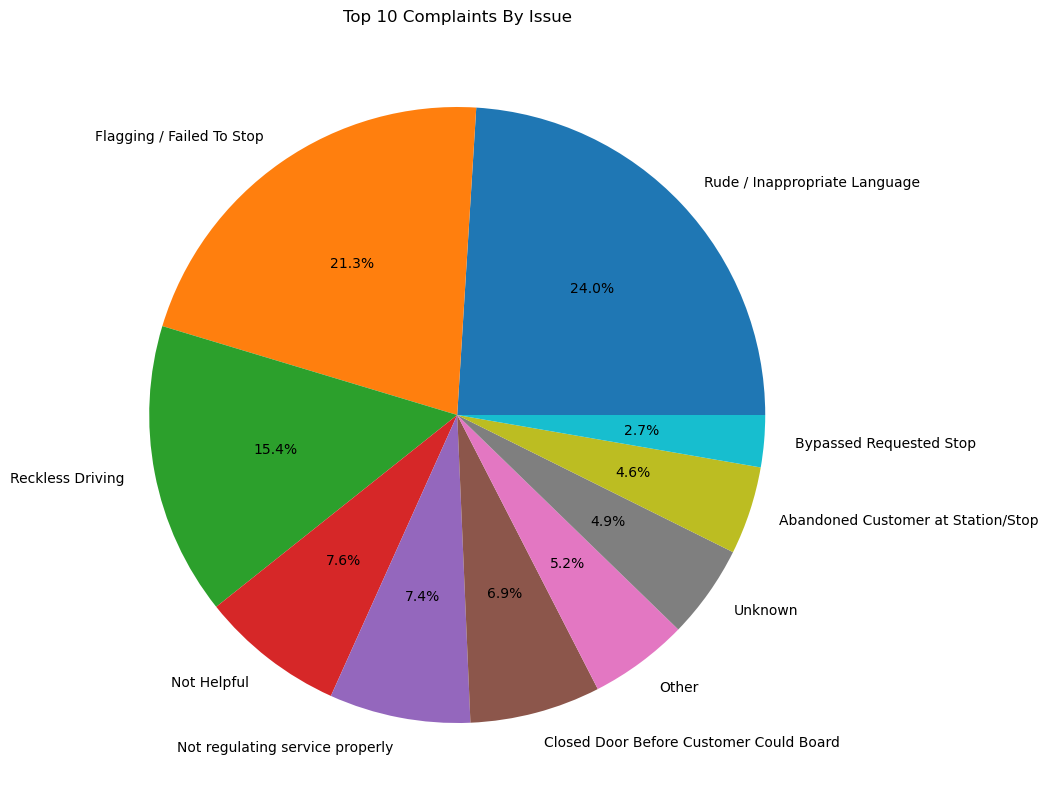

In [116]:
complaint_count['count'].plot.pie(
    title = 'Top 10 Complaints By Issue', 
    autopct = '%1.1f%%', 
    figsize = (10,10)
)

plt.ylabel('')
plt.show()

# Of the Top 10 Complaints about Employees: 24% are about Rude/Inappropriate Language, 21.3% are about Flagging/Failing to Stop, and 15.4% are about Reckless Driving.
# Note: There is different wording for some but several involve leaving customers at the wrong stop or not picking them up.

In [128]:
emp_comp.groupby(['Subject Detail','Issue Detail']).agg(count = ('Issue Detail', 'count')).sort_values(by = 'count', ascending = False)[:10]

# Bus Drivers have a lot of complaints when it comes to: 'Flagging / Failed To Stop', 'Rude / Inappropriate Language', 'Reckless Driving', 'Not regulating service properly', and 'Closed Door Before Customer Could Board'

count
Subject Detail               Issue Detail                                  
Bus Operator / Driver        Flagging / Failed To Stop                32878
                             Rude / Inappropriate Language            25016
                             Reckless Driving                         22868
                             Not regulating service properly          10614
                             Closed Door Before Customer Could Board   7298
                             Abandoned Customer at Station/Stop        7078
Ticket Clerk / Station Agent Rude / Inappropriate Language             6436
Bus Operator / Driver        Not Helpful                               5460
No Value                     Unknown                                   4573
Bus Operator / Driver        Bypassed Requested Stop                   4203

# Analyze the number of complaints filed by year and quarter. Are complaints increasing or decreasing over time?

In [133]:
year_count = emp_comp.groupby('Year').agg(complaint_count = ('Commendation or Complaint', 'count'))

year_count

,complaint_count
Year,
2014,13111
2015,20192
2016,44434
2017,38360
2018,38889
2019,50014


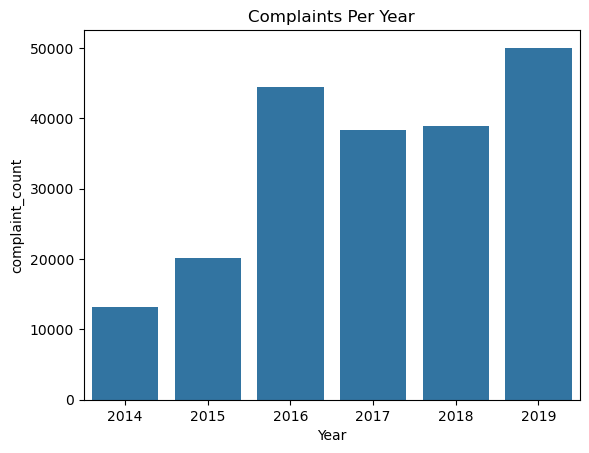

In [135]:
sns.barplot(x = 'Year', y = 'complaint_count', data = year_count)
plt.title('Complaints Per Year')
plt.show()

# The number of complaints has trended upward although there was a drop from 2016-2017

In [137]:
quarter_count = emp_comp.groupby(['Year','Quarter']).agg(complaint_count = ('Commendation or Complaint', 'count')).reset_index()

In [139]:
quarter_count['Year_Quarter'] = quarter_count['Year'].astype(str) + ' Q' + quarter_count['Quarter'].astype(str)

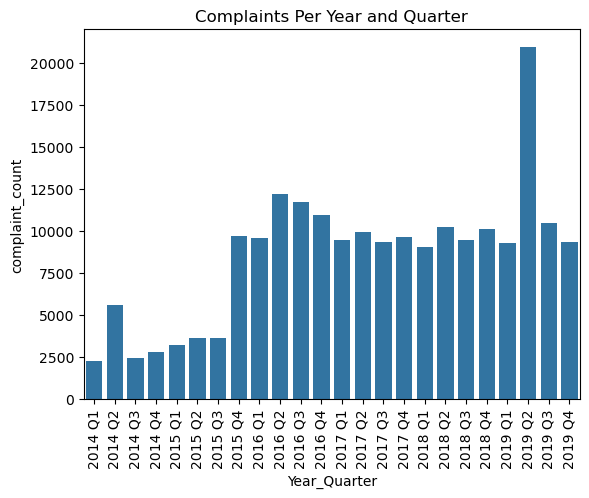

In [141]:
sns.barplot(x = 'Year_Quarter', y = 'complaint_count', data = quarter_count)
plt.title('Complaints Per Year and Quarter')
plt.xticks(rotation=90)
plt.show()

# There was a large average increase from 2014/2015 to 2016-2019. There are some fluctuations from 2015 Q4 on but relatively stable although still high complaints.  2019 Q2 had double the average complaints for what we normally see.

In [143]:
quarter = emp_comp.groupby('Quarter').agg(complaint_count = ('Commendation or Complaint', 'count')).reset_index()
quarter
# Breaking down only by Quarter shows differences between quarters but not necessarily huge differences, especially considering 2019 Q2 was so much more.

,Quarter,complaint_count
0,1,42905
1,2,62496
2,3,47020
3,4,52579


# Were there certain branches/routes that had more complaints than others? 

In [150]:
emp_comp.groupby('Branch/Line/Route').agg(count = ('Branch/Line/Route','count')).sort_values(by = 'count', ascending = False)[:20]

# We have a lot that are unknown.  New Haven has a significantly higher amount than the rest based on differences between the next lowest.  M15, Harlem, A, and Hudson are the next 4 highest.

,count
Branch/Line/Route,
No Value,35341
New Haven,2678
M15,2091
Harlem,1875
A,1864
Hudson,1771
1,1725
6,1687
2,1626


In [154]:
agency = emp_comp.groupby('Agency').agg(count = ('Agency','count')).sort_values(by = 'count', ascending = False)
agency
# NYC Buses and Subways have way more complaints than the rest of agencies.  There is 

,count
Agency,
NYC Buses,158619
Subways,29010
Metro-North Railroad,8240
Long Island Rail Road,6532
Buses,2599


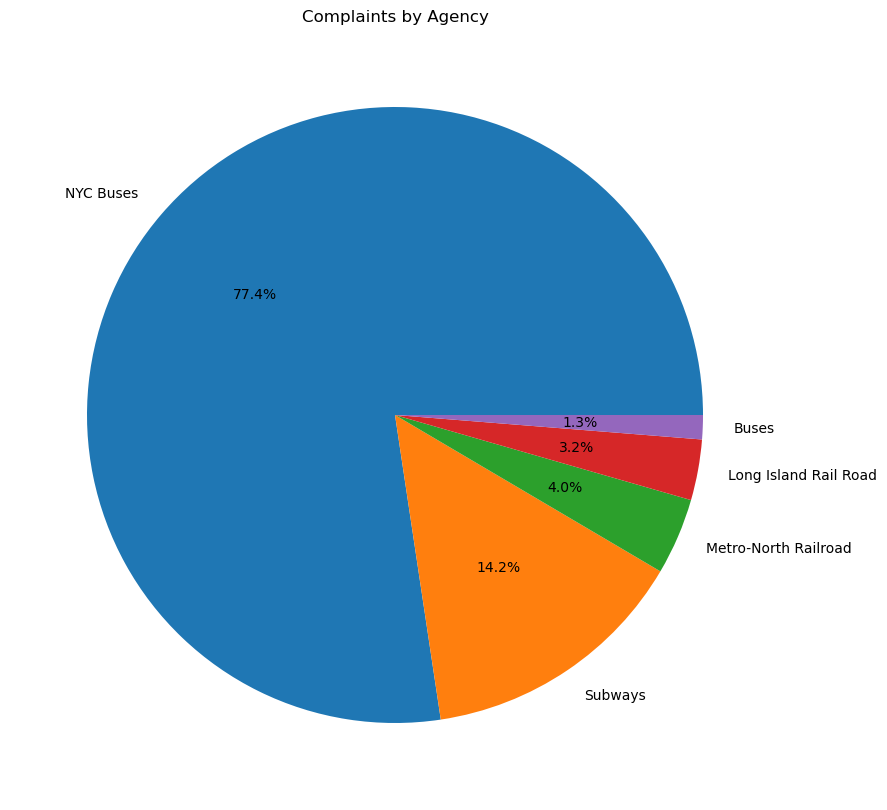

In [158]:
agency['count'].plot.pie(
    title = 'Complaints by Agency', 
    autopct = '%1.1f%%', 
    figsize = (10,10)
)

plt.ylabel('')
plt.show()

# This could be because there are way more buses and more people riding but it is significant

# **What are your recommendations to improve customer satisfaction?**

## Summary
### What are the most common subject matters or specific issues related to the complaints?
1) Drivers/Operators of vehicles whether it's trains or buses have the most complaints followed by Ticket Clerks/Station Agents.
2) Of the Top 10 Complaints about Employees: 24% are about Rude/Inappropriate Language, 21.3% are about Flagging/Failing to Stop, and 15.4% are about Reckless Driving.
3) Note: There is different wording for some but several involve leaving customers at the wrong stop or not picking them up.
### Analyze the number of complaints filed by year and quarter. Are complaints increasing or decreasing over time?
1) There was a large average increase from 2014/2015 to 2016-2019. There are some fluctuations from 2015 Q4 on, but relatively stable although still high complaints.  2019 Q2 had double the average complaints for what we normally see.
2) There was a large spike in complaints during 2019 Q2 that was double or more of what a lot of quarters had.
### Were there certain branches/routes that had more complaints than others?
1) We are missing a lot of data about lines/routes.
2) The top 5 routes with the most complaints are New Haven, M15, Harlem, A, and Hudson.
3) NYC Buses are by far the majority with 77.4%, followed by Subways with 14.2%.  This could be because there are many more buses and more people riding so more complaints or buses are having a lot of issues.  There is also a buses category that is much lower but may be buses not in the city.

## Recommendations
1) Focus training on using appropriate language, correctly stopping for customers, and driving safely as those are the top three issues. Specifically increasing customer service training to help with language, politeness, and knowledge of the job would help greatly when looking at other categories that have a high complaint count as well. 
2) Buses make up the majority of complaints so prioritizing those first would be beneficial, with Subways next in line.
3) Lines that struggle the most are New Haven, M15, Harlem, A, and Hudson so starting with them could help as well.

# Other Questions to Look Into
1) Why was there such a spike in complaints during 2019 Q2?
2) What fueled the increase in complaints from our lower average during 2014 and 2015 to our current higher average?
3) Can options be simplified on complaint forms to create more uniformity?

# This data was obtained from DataFrenchy Academy (https://www.datafrenchy.com/) and used for personal use.